# Group 1 Assignment 2

## Name: Kendrick Kee UOW ID: 7366814

## Name: Mohamed Abrar Ismail Mohamed Thahir UOW ID: 7372747

## Name: Li Jin UOW ID: 6650181

In [1]:
import os
os.environ['SPARK_HOME'] = "/Users/kendrickkee/spark-3.1.2-bin-hadoop2.7"
import findspark
findspark.init()

In [2]:
import pyspark
from pyspark.sql import SparkSession
# import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
spark = SparkSession.builder.getOrCreate()
spark

22/02/26 00:21:42 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


### initialising the spark below:

In [4]:
df = spark.read.format("csv").option("header",False).option("delimiter",',').option("ignoreTrailingWhiteSpace", True).load("covtype.data")

In [5]:
newColNames =  [
                "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
                "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
                "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
                "Horizontal_Distance_To_Fire_Points", "Wilderness_Area_1", "Wilderness_Area_2",
                "Wilderness_Area_3", "Wilderness_Area_4", "Soil_Type_1", 
                "Soil_Type_2", "Soil_Type_3", "Soil_Type_4", "Soil_Type_5", 
                "Soil_Type_6", "Soil_Type_7", "Soil_Type_8", "Soil_Type_9", "Soil_Type_10", 
                "Soil_Type_11", "Soil_Type_12", "Soil_Type_13", "Soil_Type_14", "Soil_Type_15", 
                "Soil_Type_16", "Soil_Type_17", "Soil_Type_18", "Soil_Type_19", "Soil_Type_20", 
                "Soil_Type_21", "Soil_Type_22", "Soil_Type_23", "Soil_Type_24", "Soil_Type_25", 
                "Soil_Type_26", "Soil_Type_27", "Soil_Type_28", "Soil_Type_29", "Soil_Type_30", 
                "Soil_Type_31", "Soil_Type_32", "Soil_Type_33", "Soil_Type_34", "Soil_Type_35", 
                "Soil_Type_36", "Soil_Type_37", "Soil_Type_38", "Soil_Type_39", 
                "Soil_Type_40", "Cover_Type"]

df = df.toDF(*newColNames)

Adding column headers into pyspark dataframe

In [6]:
df.show(vertical=True)

22/02/26 00:21:51 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


-RECORD 0----------------------------------
 Elevation                          | 2596 
 Aspect                             | 51   
 Slope                              | 3    
 Horizontal_Distance_To_Hydrology   | 258  
 Vertical_Distance_To_Hydrology     | 0    
 Horizontal_Distance_To_Roadways    | 510  
 Hillshade_9am                      | 221  
 Hillshade_Noon                     | 232  
 Hillshade_3pm                      | 148  
 Horizontal_Distance_To_Fire_Points | 6279 
 Wilderness_Area_1                  | 1    
 Wilderness_Area_2                  | 0    
 Wilderness_Area_3                  | 0    
 Wilderness_Area_4                  | 0    
 Soil_Type_1                        | 0    
 Soil_Type_2                        | 0    
 Soil_Type_3                        | 0    
 Soil_Type_4                        | 0    
 Soil_Type_5                        | 0    
 Soil_Type_6                        | 0    
 Soil_Type_7                        | 0    
 Soil_Type_8                    

converting the dataframe read earlier into the pandas for further data visualisation

In [7]:
p_df = df.toPandas()

In [8]:
p_df.shape

(581012, 55)

Dataframe is now in pandas dataframe type

In [9]:
# display all columns and their data types 
# and check whether each column contains null values
p_df = p_df.astype(int)
p_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area_1                   581012 non-null  int64
 11  Wilderness_Area_2                   581012 non-null 

converting all variables to int datatype

In [10]:
# print out the skewness of each features

print('Skewness of all the features: ')
skewness = p_df.skew()
print(skewness)

Skewness of all the features: 
Elevation                              -0.817596
Aspect                                  0.402628
Slope                                   0.789273
Horizontal_Distance_To_Hydrology        1.140437
Vertical_Distance_To_Hydrology          1.790250
Horizontal_Distance_To_Roadways         0.713679
Hillshade_9am                          -1.181147
Hillshade_Noon                         -1.063056
Hillshade_3pm                          -0.277053
Horizontal_Distance_To_Fire_Points      1.288644
Wilderness_Area_1                       0.205618
Wilderness_Area_2                       4.061595
Wilderness_Area_3                       0.257822
Wilderness_Area_4                       3.575561
Soil_Type_1                            13.736670
Soil_Type_2                             8.615358
Soil_Type_3                            10.838630
Soil_Type_4                             6.625176
Soil_Type_5                            18.995243
Soil_Type_6                           

#### Below we are printing the skewness of the dataframe that was read earlier. Before ploting the skewness data, we are also removing any data that is n.a

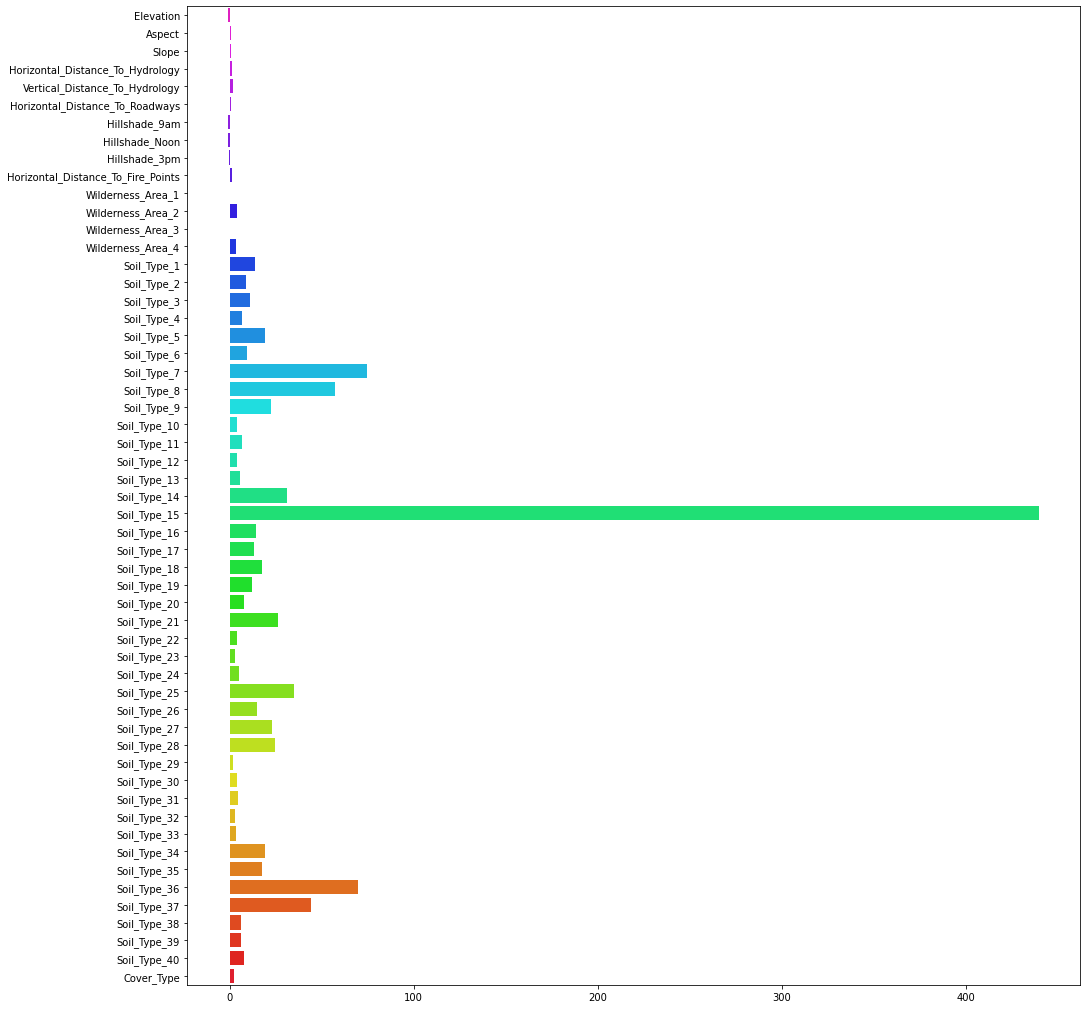

In [11]:
# set up the figure size 
plt.figure(figsize=(16,18))

# plot out the diagram to have a clear view of the skewness
sns.barplot(x=p_df.skew(), y=skewness.index, palette = 'gist_rainbow_r')

# show the plot
plt.show()

In [12]:
#  returns the correlation matrix of the dataframe
p_df.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,...,0.167077,0.070633,0.011731,0.083005,0.021107,0.035433,0.217179,0.193595,0.212612,-0.269554
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,...,0.056233,0.019163,0.010861,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866,0.017080
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,...,-0.133504,0.208942,-0.011002,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637,0.148285
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,...,0.127217,0.101195,0.070268,-0.005231,0.033421,-0.006802,0.043031,0.031922,0.147020,-0.020317
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,...,0.039762,0.167091,0.060274,-0.006092,0.012955,-0.007520,-0.008629,0.043859,0.179006,0.081664
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,...,-0.089019,-0.082779,0.006390,-0.003000,0.007550,0.016313,0.079778,0.033762,0.016052,-0.153450
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,...,0.006494,-0.064381,0.007154,0.027870,0.007865,0.010332,0.015108,-0.029620,-0.000016,-0.035415
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,...,0.125395,-0.086164,0.043061,0.005863,0.016239,-0.022707,0.042952,-0.071961,-0.040176,-0.096426
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981,...,0.083066,-0.024393,0.017757,-0.016482,0.001330,-0.022064,0.022187,-0.029040,-0.024254,-0.048290
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000,...,-0.089977,-0.059067,-0.035067,-0.000081,-0.010595,0.004180,-0.019740,-0.003301,0.008915,-0.108936


Returns the correlation matrix

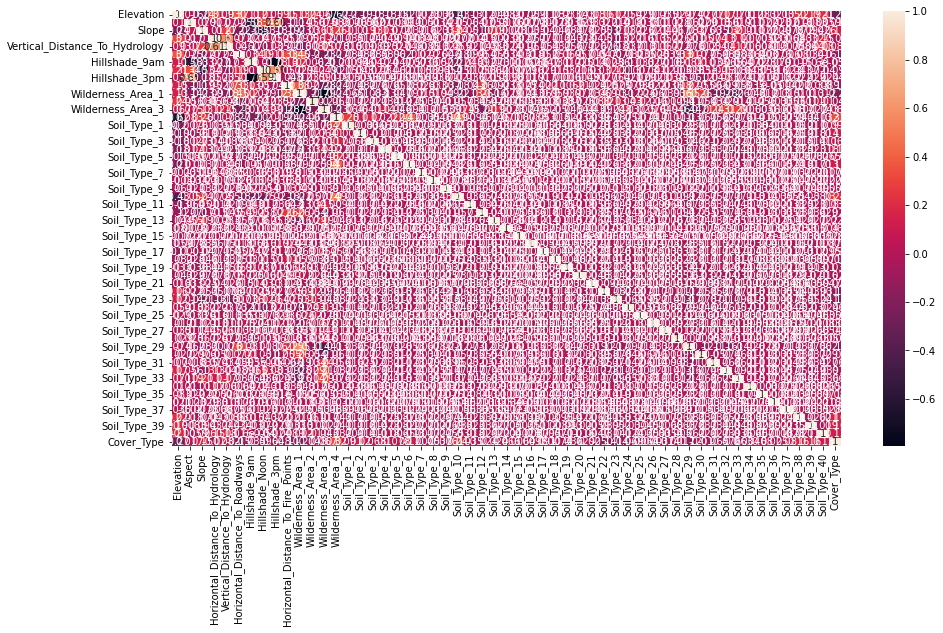

In [13]:
# visualize the correlation of all columns in this dataframe
plt.figure(figsize=(15,8))

# using heapmap to plot
sns.heatmap(p_df.corr(), annot=True)

# show the plot
plt.show()

Here is the plot of the correlation matrix

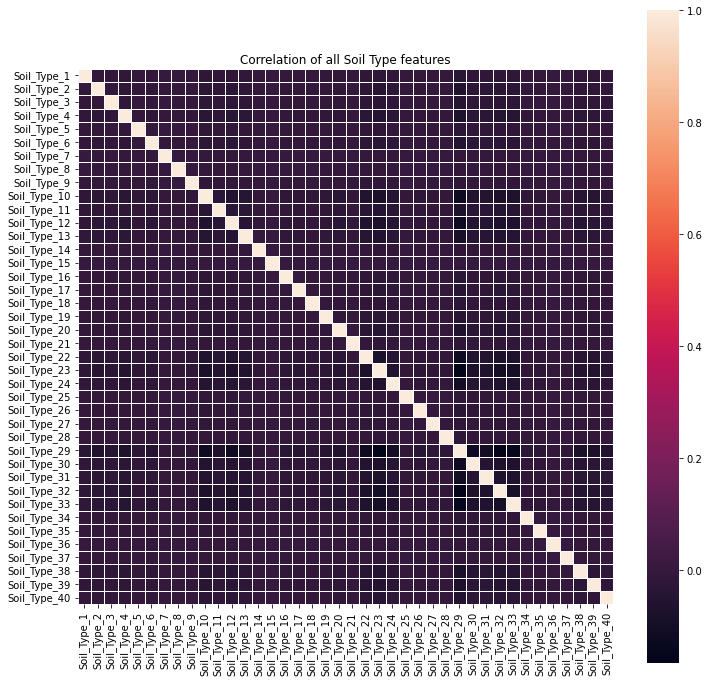

In [14]:
# get and store all the Soil Type features
columns = [cols for cols in p_df.columns if str(cols).startswith('Soil')]

# set the figure size
plt.figure(figsize=(12, 12))

# using heapmap to plot
sns.heatmap(p_df[columns].corr(), square=True, linewidths=1)

# set the title of the plot
plt.title('Correlation of all Soil Type features')

# show the plot
plt.show()

Here is the correlation between each soil type

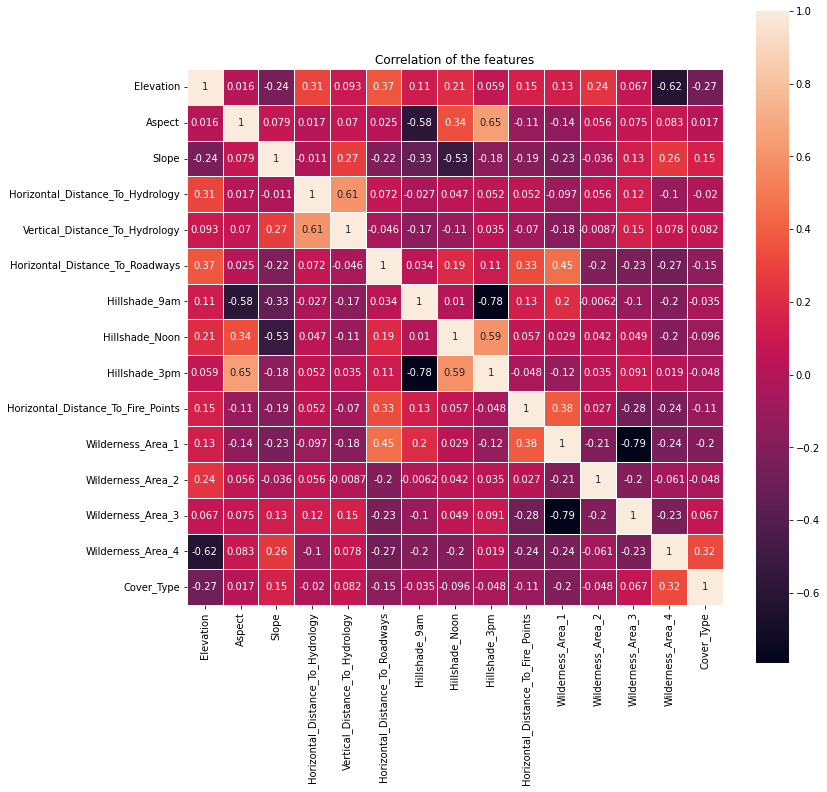

In [15]:
# get and store all the not Soil Type features
columns = [cols for cols in p_df.columns if not str(cols).startswith('Soil')]

# set the figure size
plt.figure(figsize=(12, 12))

# using heapmap to plot
sns.heatmap(p_df[columns].corr(), square=True, linewidths=1, annot = True)

# set the title of the plot
plt.title('Correlation of the features')

# show the plot
plt.show()

Here is the correlation matrix without soil features

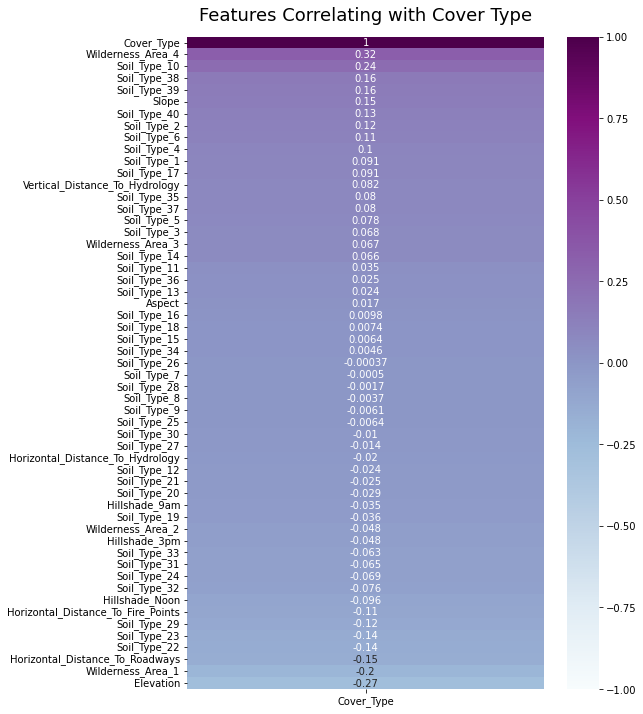

In [16]:
# visualize the correlation of all columns in this dataframe
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(p_df.corr()[['Cover_Type']].sort_values(by='Cover_Type', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BuPu')
heatmap.set_title('Features Correlating with Cover Type', fontdict={'fontsize':18}, pad=16);

Here are all the feature correlation to cover_type

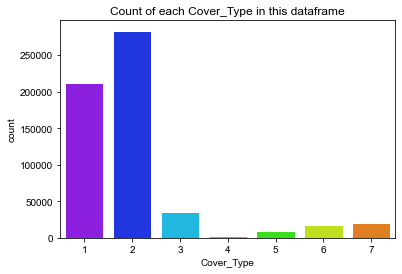

In [17]:
# visualize the count of each 'Cover_Type' in this dataframe
plt.title('Count of each Cover_Type in this dataframe')
sns.set_style('whitegrid')
sns.countplot(x=p_df['Cover_Type'], palette = 'gist_rainbow_r')

plt.show()

Here are the count distribution of each cover type

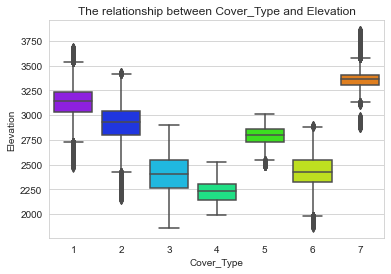

In [18]:
# Visualize the relationship between cover_type and elevation
plt.title('The relationship between Cover_Type and Elevation')
sns.boxplot(data=p_df, x='Cover_Type', y='Elevation', palette='gist_rainbow_r')

plt.show()

Here is the boxplot between target and elevation

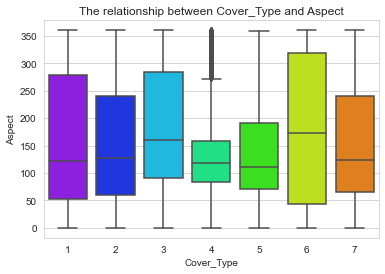

In [19]:
# Visualize the relationship between cover_type and aspect
plt.title('The relationship between Cover_Type and Aspect')
sns.boxplot(data=p_df, x='Cover_Type', y='Aspect', palette='gist_rainbow_r')

plt.show()

Here is the boxplot between target and Aspect

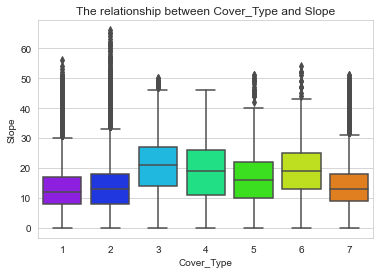

In [20]:
# Visualize the relationship between cover_type and slope
plt.title('The relationship between Cover_Type and Slope')
sns.boxplot(data=p_df, x='Cover_Type', y='Slope', palette='gist_rainbow_r')

plt.show()

Here is the boxplot between target and slope

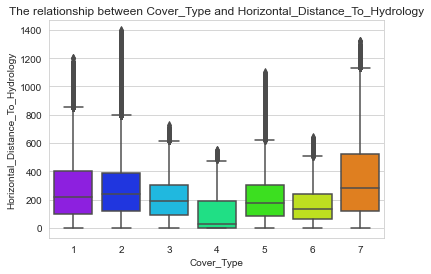

In [21]:
# Visualize the relationship between cover_type and Horizontal_Distance_To_Hydrology
plt.title('The relationship between Cover_Type and Horizontal_Distance_To_Hydrology')
sns.boxplot(data=p_df, x='Cover_Type', y='Horizontal_Distance_To_Hydrology', palette='gist_rainbow_r')

plt.show()

Here is the boxplot between target and Horizontal Distance to Hydrology

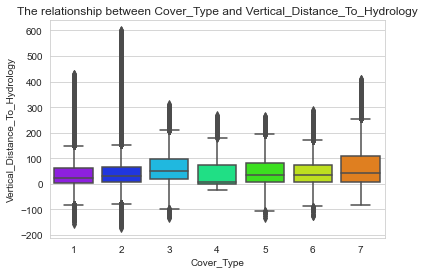

In [22]:
# Visualize the relationship between cover_type and Vertical_Distance_To_Hydrology
plt.title('The relationship between Cover_Type and Vertical_Distance_To_Hydrology')
sns.boxplot(data=p_df, x='Cover_Type', y='Vertical_Distance_To_Hydrology', palette='gist_rainbow_r')

plt.show()

Here is the boxplot between target and vertical distance

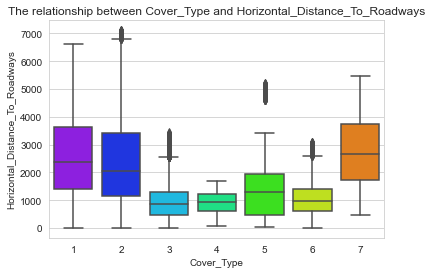

In [23]:
# Visualize the relationship between cover_type and Horizontal_Distance_To_Roadways
plt.title('The relationship between Cover_Type and Horizontal_Distance_To_Roadways')
sns.boxplot(data=p_df, x='Cover_Type', y='Horizontal_Distance_To_Roadways', palette='gist_rainbow_r')

plt.show()

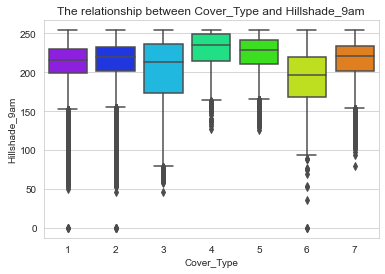

In [24]:
# Visualize the relationship between cover_type and Hillshade_9am
plt.title('The relationship between Cover_Type and Hillshade_9am')
sns.boxplot(data=p_df, x='Cover_Type', y='Hillshade_9am', palette='gist_rainbow_r')

plt.show()

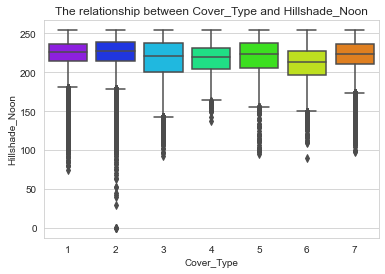

In [25]:
# Visualize the relationship between cover_type and Hillshade_Noon
plt.title('The relationship between Cover_Type and Hillshade_Noon')
sns.boxplot(data=p_df, x='Cover_Type', y='Hillshade_Noon', palette='gist_rainbow_r')

plt.show()

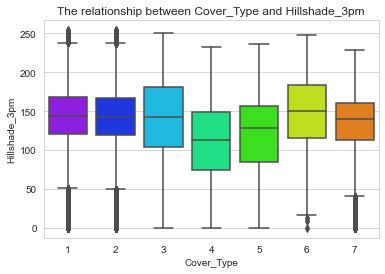

In [26]:
# Visualize the relationship between cover_type and Hillshade_3pm
plt.title('The relationship between Cover_Type and Hillshade_3pm')
sns.boxplot(data=p_df, x='Cover_Type', y='Hillshade_3pm', palette='gist_rainbow_r')

plt.show()

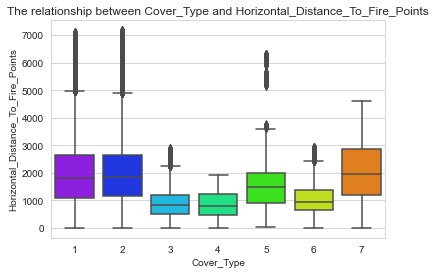

In [27]:
# Visualize the relationship between cover_type and Horizontal_Distance_To_Fire_Points
plt.title('The relationship between Cover_Type and Horizontal_Distance_To_Fire_Points')
sns.boxplot(data=p_df, x='Cover_Type', y='Horizontal_Distance_To_Fire_Points', palette='gist_rainbow_r')

plt.show()

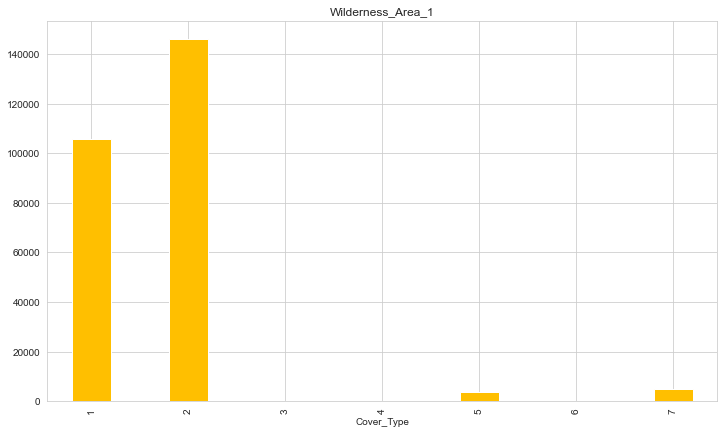

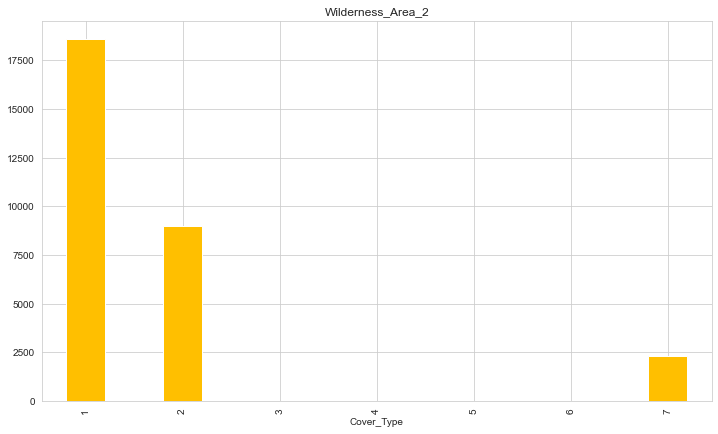

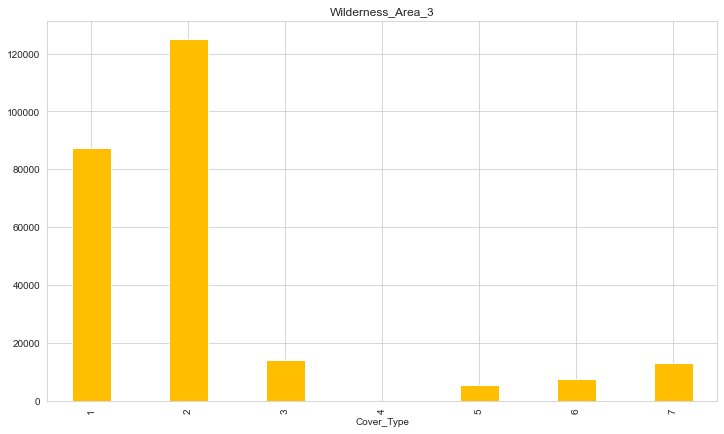

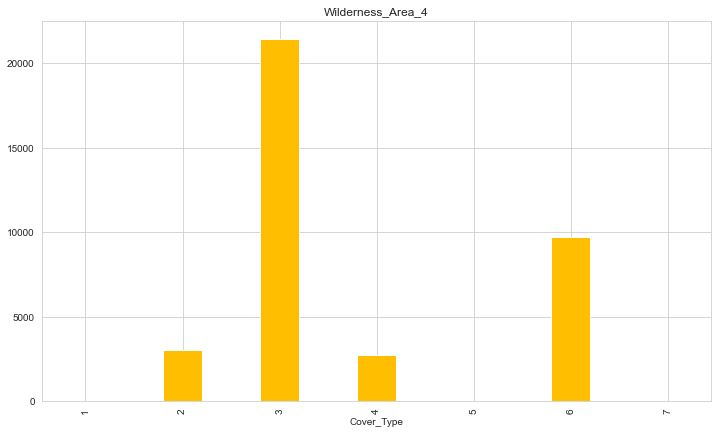

In [28]:
# define the columns that want to plot out
areas = ['Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4']
    
# using for loop to generate the graph
for i in range(len(areas)):
    
    # plot i number of graphs
    plt.figure(i, figsize=(12, 7))
 
    # group by each of the cover type and sum each of them
    p_df.groupby('Cover_Type')[areas[i]].sum().plot.bar(width = 0.4, color='#ffbf00')
    
    # display the title name
    plt.title(areas[i])

All plots of cover type against each wilderness type

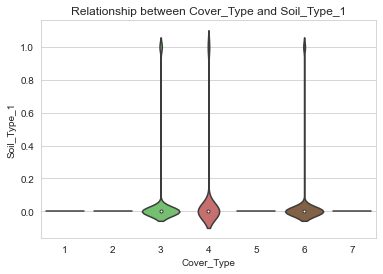

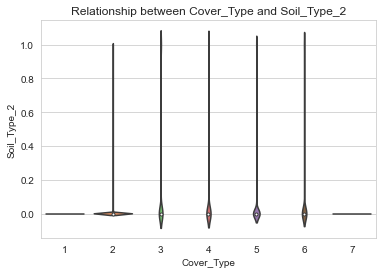

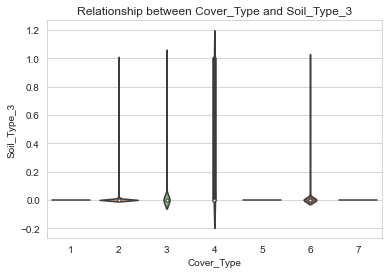

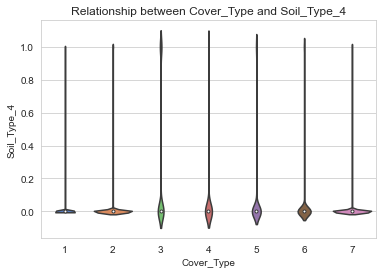

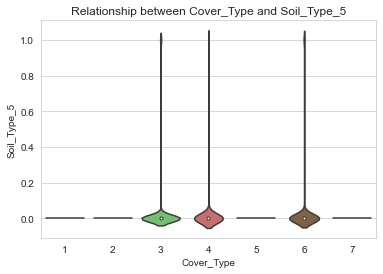

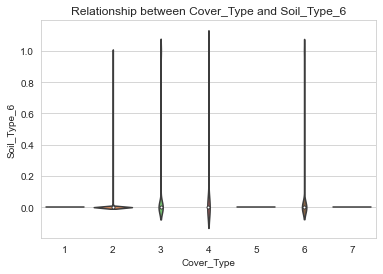

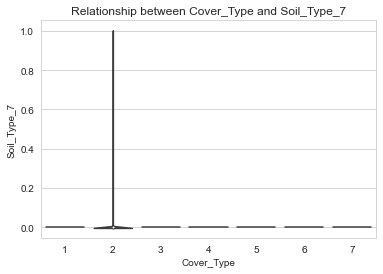

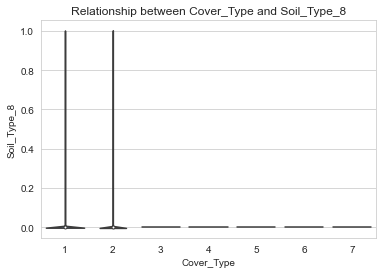

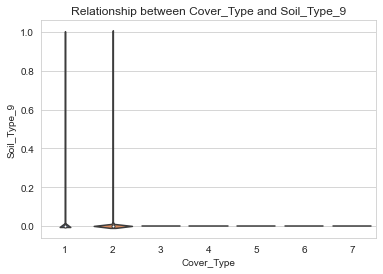

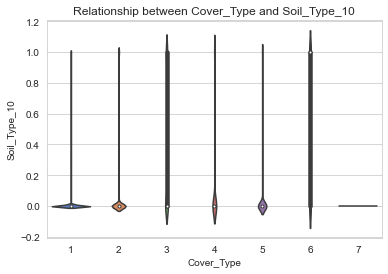

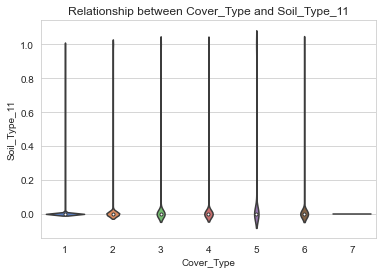

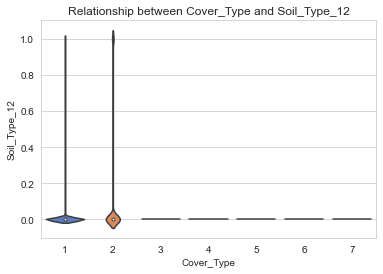

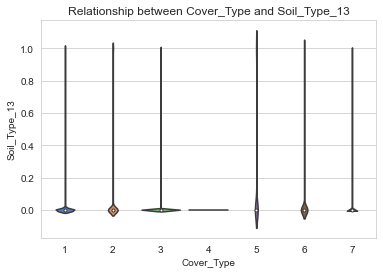

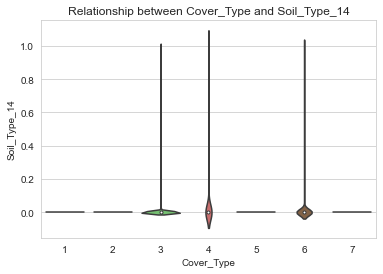

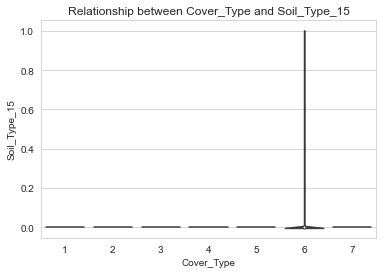

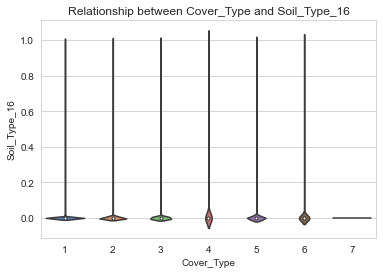

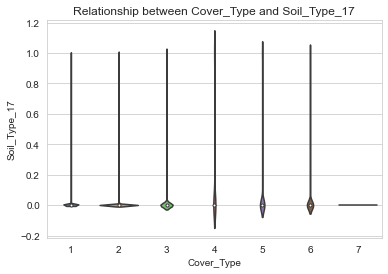

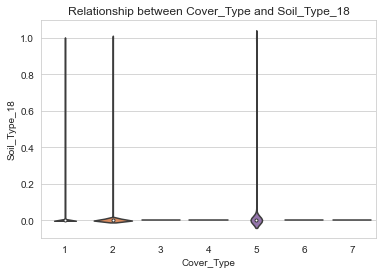

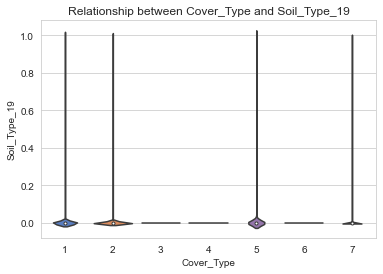

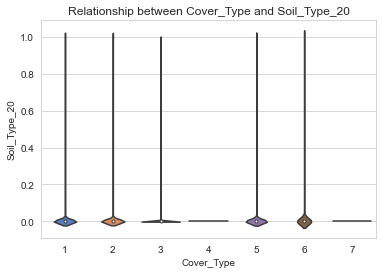

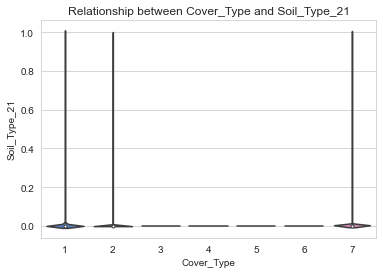

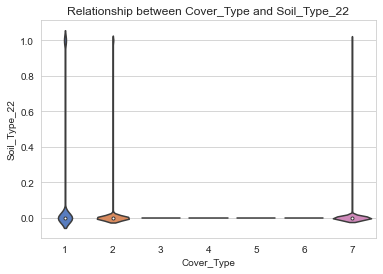

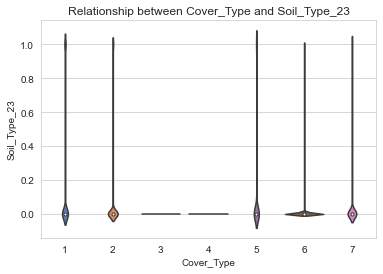

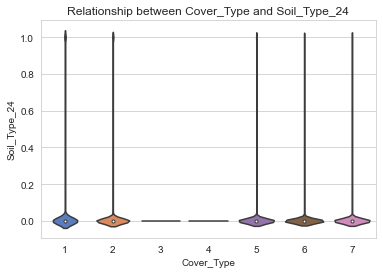

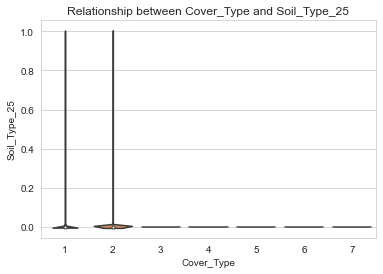

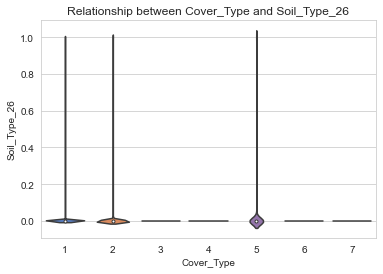

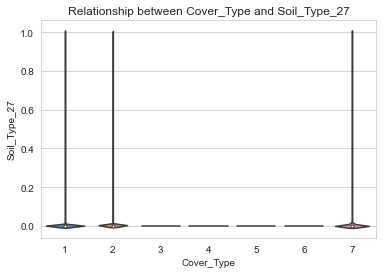

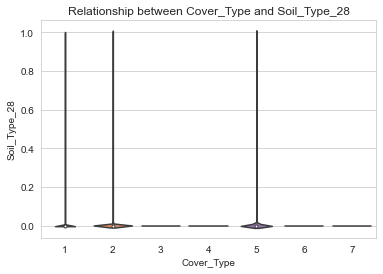

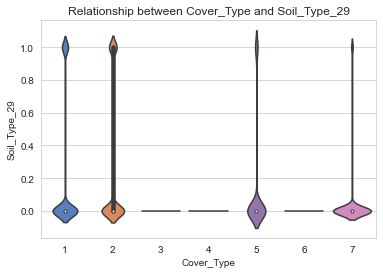

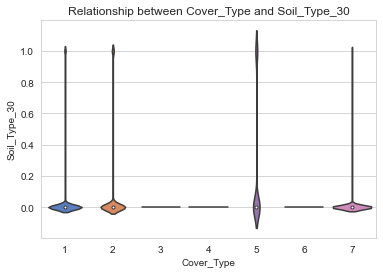

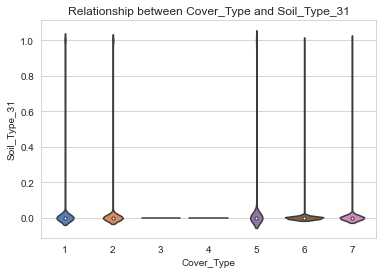

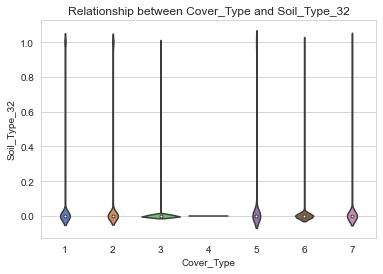

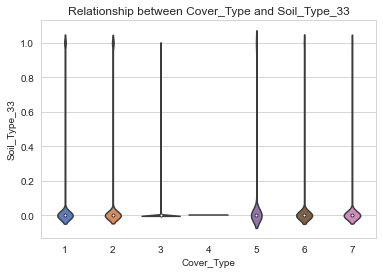

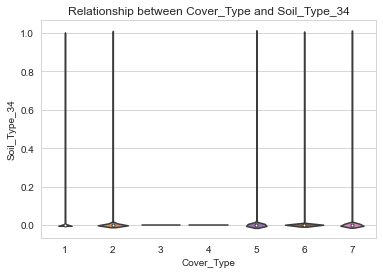

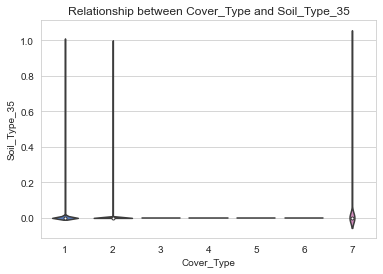

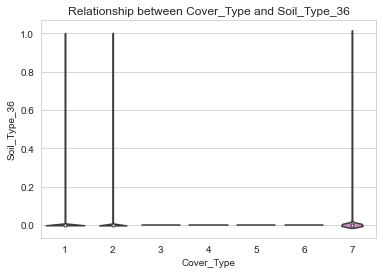

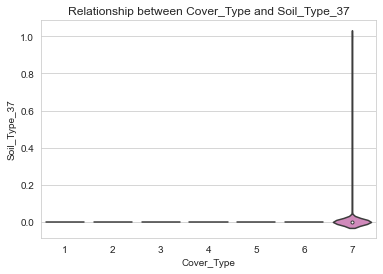

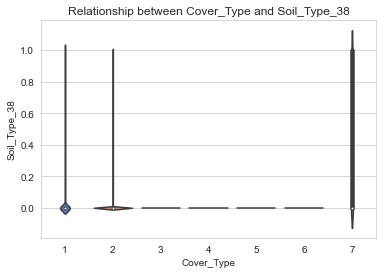

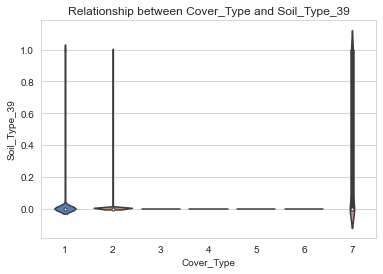

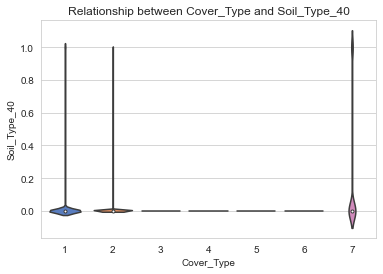

In [29]:
# get all the columns name
all_columns = p_df.columns

# eliminate th target column
eliminate_target = len(all_columns)-1

# x-axis is for target column
x = all_columns[eliminate_target]

# y-axis is for the features
y = all_columns[14:eliminate_target]

# plot out the graph
for a in range(0, 40):
    sns.violinplot(data=p_df, x=x, y=y[a], palette="muted")
    
    # set the title for each of the graphes
    plt.title('Relationship between Cover_Type and Soil_Type_' + str(a+1))
    plt.show()

All violin plots for all feature sets.

### Stratified split for training and testing dataset

In [30]:
df.groupBy("Cover_Type").count().show()

+----------+------+
|Cover_Type| count|
+----------+------+
|         7| 20510|
|         3| 35754|
|         5|  9493|
|         6| 17367|
|         1|211840|
|         4|  2747|
|         2|283301|
+----------+------+



In [31]:
from pyspark.sql.types import IntegerType

for name in newColNames:
    df = df.withColumn(name,df[name].cast(IntegerType()))

In [32]:
from pyspark.ml.feature import VectorAssembler

numericCols = newColNames[:-1]
assembler = VectorAssembler(inputCols=numericCols, outputCol="features")
df = assembler.transform(df)


In [33]:
df.show(vertical = True)

-RECORD 0--------------------------------------------------
 Elevation                          | 2596                 
 Aspect                             | 51                   
 Slope                              | 3                    
 Horizontal_Distance_To_Hydrology   | 258                  
 Vertical_Distance_To_Hydrology     | 0                    
 Horizontal_Distance_To_Roadways    | 510                  
 Hillshade_9am                      | 221                  
 Hillshade_Noon                     | 232                  
 Hillshade_3pm                      | 148                  
 Horizontal_Distance_To_Fire_Points | 6279                 
 Wilderness_Area_1                  | 1                    
 Wilderness_Area_2                  | 0                    
 Wilderness_Area_3                  | 0                    
 Wilderness_Area_4                  | 0                    
 Soil_Type_1                        | 0                    
 Soil_Type_2                        | 0 

In [34]:
# Taking 70% of both 0's and 1's into training set
train = df.sampleBy("Cover_Type", fractions={1: 0.66,2: 0.66,3: 0.66,4: 0.66,5: 0.66,6: 0.66,7: 0.66}, seed=42069)
# Subtracting 'train' from original 'data' to get test set 
test = df.subtract(train)

In [35]:
train.groupBy("Cover_Type").count().show()

+----------+------+
|Cover_Type| count|
+----------+------+
|         1|139820|
|         6| 11559|
|         3| 23684|
|         5|  6241|
|         4|  1823|
|         7| 13501|
|         2|186981|
+----------+------+



In [36]:
test.groupBy("Cover_Type").count().show()

+----------+-----+
|Cover_Type|count|
+----------+-----+
|         1|72020|
|         6| 5808|
|         3|12070|
|         5| 3252|
|         4|  924|
|         7| 7009|
|         2|96320|
+----------+-----+



As observed, trianing and test data set are distributed 2/3 and 1/3

## Random Forest Classification

In [37]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol = 'features',labelCol = 'Cover_Type',impurity = 'entropy')
rfModel = rf.fit(train)
predictions = rfModel.transform(test)

In [38]:

from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="Cover_Type", predictionCol="prediction")
accuracy = evaluator.evaluate(predictions)
print("Accuracy = %s" % (accuracy))
print("Test Error = %s" % (1.0 - accuracy))

Accuracy = 0.6356904615307795
Test Error = 0.36430953846922054


Using the default settings of pyspark ML RandomForest, we get an accuracy of 64%

## Random Forest Tuning

In [39]:
# Load in required libraries
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create a parameter grid for tuning the model
rfparamGrid = (ParamGridBuilder()
               .addGrid(rf.maxDepth, [2, 5, 10])
               .addGrid(rf.maxBins, [5, 10, 20])
               .addGrid(rf.numTrees, [5, 20, 50])
               .build())

Using a grid of 3x3 possible parameters of max Depth, max bins and number of trees to find the most optimal parameters.

In [40]:
# Create 5-fold CrossValidator
rfcv = CrossValidator(estimator = rf,
                      estimatorParamMaps = rfparamGrid,
                      evaluator = evaluator,
                      numFolds = 5)
# Fit the model to the data
rfcvModel = rfcv.fit(train)

22/02/26 00:26:06 WARN DAGScheduler: Broadcasting large task binary with size 1368.5 KiB
22/02/26 00:26:07 WARN DAGScheduler: Broadcasting large task binary with size 2040.3 KiB
22/02/26 00:26:08 WARN DAGScheduler: Broadcasting large task binary with size 1154.1 KiB
22/02/26 00:26:15 WARN DAGScheduler: Broadcasting large task binary with size 1156.8 KiB
22/02/26 00:26:17 WARN DAGScheduler: Broadcasting large task binary with size 1898.1 KiB
22/02/26 00:26:18 WARN DAGScheduler: Broadcasting large task binary with size 3.0 MiB
22/02/26 00:26:20 WARN DAGScheduler: Broadcasting large task binary with size 4.6 MiB
22/02/26 00:26:23 WARN DAGScheduler: Broadcasting large task binary with size 2.5 MiB
22/02/26 00:26:33 WARN DAGScheduler: Broadcasting large task binary with size 1473.6 KiB
22/02/26 00:26:34 WARN DAGScheduler: Broadcasting large task binary with size 2.2 MiB
22/02/26 00:26:36 WARN DAGScheduler: Broadcasting large task binary with size 1380.8 KiB
22/02/26 00:26:44 WARN DAGSchedul

22/02/26 00:34:40 WARN DAGScheduler: Broadcasting large task binary with size 1396.8 KiB
22/02/26 00:34:47 WARN DAGScheduler: Broadcasting large task binary with size 1201.6 KiB
22/02/26 00:34:49 WARN DAGScheduler: Broadcasting large task binary with size 2012.7 KiB
22/02/26 00:34:51 WARN DAGScheduler: Broadcasting large task binary with size 3.2 MiB
22/02/26 00:34:53 WARN DAGScheduler: Broadcasting large task binary with size 5.0 MiB
22/02/26 00:34:56 WARN DAGScheduler: Broadcasting large task binary with size 1037.2 KiB
22/02/26 00:34:57 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
22/02/26 00:36:14 WARN DAGScheduler: Broadcasting large task binary with size 1383.7 KiB
22/02/26 00:36:15 WARN DAGScheduler: Broadcasting large task binary with size 2.0 MiB
22/02/26 00:36:16 WARN DAGScheduler: Broadcasting large task binary with size 1196.7 KiB
22/02/26 00:36:23 WARN DAGScheduler: Broadcasting large task binary with size 1155.1 KiB
22/02/26 00:36:25 WARN DAGSchedul

In [41]:
# Score the testing dataset using your fitted model for evaluation purposes
rfpredictions = rfcvModel.transform(test)

In [42]:
#Evaluate the model
accuracy = evaluator.evaluate(rfpredictions)
print("Accuracy after tuning = %s" % (accuracy))
print("Test Error after tuning = %s" % (1.0 - accuracy))

22/02/26 00:38:00 WARN DAGScheduler: Broadcasting large task binary with size 1401.4 KiB


Accuracy after tuning = 0.7294080809762995
Test Error after tuning = 0.2705919190237005


Post tuning, we now obtain an accuracy improvement to 72% from the prior 64%

## Decision Tree Classification

In [51]:
from pyspark.ml.classification import DecisionTreeClassifier
dtc = DecisionTreeClassifier(featuresCol="features", labelCol="Cover_Type")
dtModel = dtc.fit(train)

pred = dtModel.transform(test)

In [52]:
accuracy = evaluator.evaluate(pred)
print("Accuracy = %s" % (accuracy))
print("Test Error = %s" % (1.0 - accuracy))

Accuracy = 0.6801123547029155
Test Error = 0.31988764529708447


Using the default settings of Decision Tree Classifier, we get an accuracy of 68%

## Decision Tree Tuning

In [53]:
# Create a parameter grid for tuning the model
dtparamGrid = (ParamGridBuilder()
             .addGrid(dtc.maxDepth, [2, 5, 10])
             .addGrid(dtc.maxBins, [10, 20])
             .build())

In [54]:
# Create 5-fold CrossValidator
dtcv = CrossValidator(estimator = dtc,
                      estimatorParamMaps = dtparamGrid,
                      evaluator = evaluator,
                      numFolds = 5)

In [55]:
# Fit the model to the data
dtcvModel = dtcv.fit(train)

# Score the testing dataset using your fitted model for evaluation purposes
dtpredictions = dtcvModel.transform(test)

22/02/26 00:48:17 WARN CacheManager: Asked to cache already cached data.
22/02/26 00:48:17 WARN CacheManager: Asked to cache already cached data.


In [56]:
#Evaluate the model
accuracy = evaluator.evaluate(dtpredictions)
print("Accuracy after tuning = %s" % (accuracy))
print("Test Error after tuning = %s" % (1.0 - accuracy))

Accuracy after tuning = 0.7669430985055272
Test Error after tuning = 0.23305690149447278


The tuned decision tree model was able to improve it's accuracy from 68% to 76%.

## Logistic Regression Classifier

In [57]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol="features", labelCol="Cover_Type", maxIter = 100, regParam = 0.3)
lrModel = lr.fit(train)
pred_lr = lrModel.transform(test)

22/02/26 00:51:32 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
22/02/26 00:51:33 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


In [58]:
evaluator = MulticlassClassificationEvaluator(labelCol="Cover_Type", predictionCol="prediction")
accuracy = evaluator.evaluate(pred_lr)
print("Accuracy = %s" % (accuracy))
print("Test Error = %s" % (1.0 - accuracy))

Accuracy = 0.6164761973373472
Test Error = 0.38352380266265285


Using default logistic Regression parameters, we get an accuracy of 61%

## Logistic Regression Tuning

In [59]:
# Create a parameter grid for tuning the model
lrparamGrid = (ParamGridBuilder().
               addGrid(lr.regParam, [0.01, 0.5]).
               build())

In [60]:
# Create 5-fold CrossValidator
lrcv = CrossValidator(estimator = lr,
                      estimatorParamMaps = lrparamGrid,
                      evaluator = evaluator,
                      numFolds = 5)

In [61]:
# Fit the model to the data
lrcvModel = lrcv.fit(train)

# Score the testing dataset using your fitted model for evaluation purposes
lrpredictions = lrcvModel.transform(test)

In [62]:
#Evaluate the model
accuracy = evaluator.evaluate(lrpredictions)
print("Accuracy after tuning = %s" % (accuracy))
print("Test Error after tuning = %s" % (1.0 - accuracy))

Accuracy after tuning = 0.6881760358950685
Test Error after tuning = 0.3118239641049315


As observed, tuned Logistic Regression Model improved to an accuracy of 68%.

## User-Defined Transform functionality

In [128]:
new_df = spark.read.format("csv").option("header",False).option("delimiter",',').option("ignoreTrailingWhiteSpace", True).load("covtype.data")

In [132]:
newColNames =  [
                "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
                "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
                "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
                "Horizontal_Distance_To_Fire_Points", "Wilderness_Area_1", "Wilderness_Area_2",
                "Wilderness_Area_3", "Wilderness_Area_4", "Soil_Type_1", 
                "Soil_Type_2", "Soil_Type_3", "Soil_Type_4", "Soil_Type_5", 
                "Soil_Type_6", "Soil_Type_7", "Soil_Type_8", "Soil_Type_9", "Soil_Type_10", 
                "Soil_Type_11", "Soil_Type_12", "Soil_Type_13", "Soil_Type_14", "Soil_Type_15", 
                "Soil_Type_16", "Soil_Type_17", "Soil_Type_18", "Soil_Type_19", "Soil_Type_20", 
                "Soil_Type_21", "Soil_Type_22", "Soil_Type_23", "Soil_Type_24", "Soil_Type_25", 
                "Soil_Type_26", "Soil_Type_27", "Soil_Type_28", "Soil_Type_29", "Soil_Type_30", 
                "Soil_Type_31", "Soil_Type_32", "Soil_Type_33", "Soil_Type_34", "Soil_Type_35", 
                "Soil_Type_36", "Soil_Type_37", "Soil_Type_38", "Soil_Type_39", 
                "Soil_Type_40", "Cover_Type"]

new_df = new_df.toDF(*newColNames)
for name in newColNames:
    new_df = new_df.withColumn(name,new_df[name].cast(IntegerType()))

In [157]:
from pyspark.ml.feature import Bucketizer
bucketizer = Bucketizer(splits=[ 0,2278, 2809, 2996, 3163,3694, float('Inf') ],inputCol="Elevation", outputCol="Elevation_Levels")
df_buck = bucketizer.setHandleInvalid("keep").transform(new_df)

df_buck = df_buck.drop(df_buck.Elevation)#drop original Elevation value

In [158]:
df_buck = df_buck.select([df_buck.columns[-1]] + df_buck.columns[:-1])

### Prep new transformed data for Machine learning

In [159]:
newColNames =  [
                "Elevation_Levels","Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
                "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
                "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
                "Horizontal_Distance_To_Fire_Points", "Wilderness_Area_1", "Wilderness_Area_2",
                "Wilderness_Area_3", "Wilderness_Area_4", "Soil_Type_1", 
                "Soil_Type_2", "Soil_Type_3", "Soil_Type_4", "Soil_Type_5", 
                "Soil_Type_6", "Soil_Type_7", "Soil_Type_8", "Soil_Type_9", "Soil_Type_10", 
                "Soil_Type_11", "Soil_Type_12", "Soil_Type_13", "Soil_Type_14", "Soil_Type_15", 
                "Soil_Type_16", "Soil_Type_17", "Soil_Type_18", "Soil_Type_19", "Soil_Type_20", 
                "Soil_Type_21", "Soil_Type_22", "Soil_Type_23", "Soil_Type_24", "Soil_Type_25", 
                "Soil_Type_26", "Soil_Type_27", "Soil_Type_28", "Soil_Type_29", "Soil_Type_30", 
                "Soil_Type_31", "Soil_Type_32", "Soil_Type_33", "Soil_Type_34", "Soil_Type_35", 
                "Soil_Type_36", "Soil_Type_37", "Soil_Type_38", "Soil_Type_39", 
                "Soil_Type_40", "Cover_Type"]
numericCols = newColNames[:-1]
assembler = VectorAssembler(inputCols=numericCols, outputCol="features")
df_buck = assembler.transform(df_buck)


In [160]:
# Taking 70% of both 0's and 1's into training set
train = df_buck.sampleBy("Cover_Type", fractions={1: 0.66,2: 0.66,3: 0.66,4: 0.66,5: 0.66,6: 0.66,7: 0.66}, seed=42069)
# Subtracting 'train' from original 'data' to get test set 
test = df_buck.subtract(train)

In [161]:
train.groupBy("Cover_Type").count().show()

+----------+------+
|Cover_Type| count|
+----------+------+
|         1|139820|
|         6| 11559|
|         3| 23684|
|         5|  6241|
|         4|  1823|
|         7| 13501|
|         2|186981|
+----------+------+



In [162]:
test.groupBy("Cover_Type").count().show()

+----------+-----+
|Cover_Type|count|
+----------+-----+
|         1|72020|
|         6| 5808|
|         3|12070|
|         5| 3252|
|         4|  924|
|         7| 7009|
|         2|96320|
+----------+-----+



In [165]:
# Fit the model to the data
dtcvModel1 = dtcv.fit(train)

# Score the testing dataset using your fitted model for evaluation purposes
dtpredictions1 = dtcvModel1.transform(test)

In [166]:
#Evaluate the model
accuracy = evaluator.evaluate(dtpredictions1)
print("Accuracy after tuning = %s" % (accuracy))
print("Test Error after tuning = %s" % (1.0 - accuracy))

Accuracy after tuning = 0.7592214659184917
Test Error after tuning = 0.2407785340815083


### After binning elevation into discrete values, accuracy deproved from 76.6% to 75.9%, this could be due to the loss of information during the bucketizing process